# Методы решения нелинейных уравнений

## Подключение необходимых библиотек

In [1]:
# модули для математических операций
import math
import numpy as np
# модули для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
# модули для работы с данными
import pandas as pd
pd.options.display.float_format ='{:,.8f}'.format

## Задача 1

На примере уравнения $$2\sin3x = x^2 - 4x + 3$$ провести сравнительный анализ следующих методов решения нелинейных уравнений:
1. метод Ньютона с постоянной производной;
2. метод секущих;
3. метод Стеффенсена;
4. метод Чебышева третьего порядка.

### Постановка задачи

Пусть задана функция $f(x)$ действительного переменного $x \in \mathbb{R}$. Требуется найти корни уравнения $$f(x) = 0,$$
или, что то же самое, нули функции $f(x)$. 

Выясним, является ли задача корректно поставленной. Для ответа на вопрос существования и единственности решения введем теорему из математического анализа.

**Теорема**. *Если функция $f(x)$ непрерывна на отрезке $[a,b]$ и принимает на его концах значения разных знаков, то на этом отрезке существует по крайней мере один корень уравнения $f(x) = 0$.
Если при этом функция $f(x)$ будет монотонной на отрезке $[a,b]$, то она может иметь только один корень.*

В данном случае вопрос непрерывной зависимости от входных данных отпадает.

### Общее описание метода решения задачи

При решении таких уравнений численными методами, необходимо заниматься решением сразу двух задач:
1. отделение корней;
2. вычисление корней с требуемой точностью.

### Отделение корней

Данный этап будет общим для всех рассматриваемых методов, так как в независимости от используемого метода сами корни уравнения не меняют своего расположения на числовой прямой. Этот этап необходим для того, чтобы в процессе приближения корня мы случайным образом не пришли к другому корню, не тому, для которого мы считали приближение. 

Суть этого этапа заключается в том, что мы выбираем для каждого корня отрезок, в котором он находится, при этом мы гарантируем, что других корней в этом отрезке нет.

Отделять корни будем, используя графический метод.

Для начала определим исследуемую функцию. Пусть $$f(x) = 2\sin3x - x^2 + 4x -3 = 0,$$
то есть корни этого уравнения мы и будем искать. Сразу заметим, что эта функция непрерывная, так как является результатом сложения непрерывных функций.

In [2]:
def f(x):
    return 2*np.sin(3*x) - x**2 + 4*x - 3

Сперва изобразим графически две следующие функции:
$$y_1(x) = 2\sin3x,\quad y_2(x) = x^2 - 4x + 3.$$
Причем предположим, что отрезка $[-10; 10]$ для начала нам будет достаточно (выбор этого отрезка основан на интуитивных предположениях).

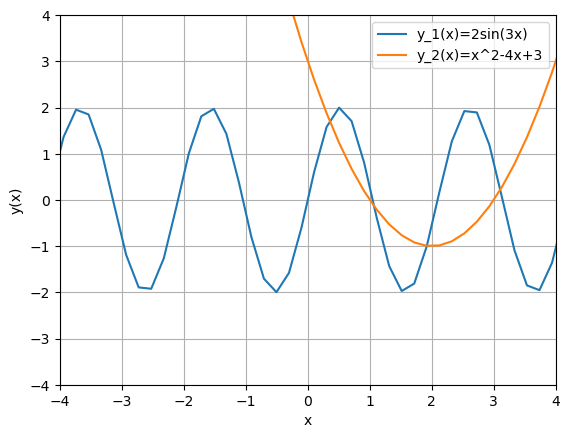

In [3]:
def y_1(x):
    return 2*np.sin(3*x)

def y_2(x):
    return x**2-4*x+3

x = np.linspace(-10, 10, 100)

fig, ax = plt.subplots()
ax.plot(x, y_1(x), label='y_1(x)=2sin(3x)')
ax.plot(x, y_2(x), label='y_2(x)=x^2-4x+3')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()

Зная свойства параболы и синусоиды мы с уверенностью можем считать, что в данной плоскости два этих графика больше не пересекутся ни в какой другой точке кроме тех, что можно увидеть выше. Таким образом, исследуемое нами уравнение имеет 4 корня, причем, исходя из графика, эти корни лежат приблизительно в следующих отрезках:
$$[0; 0.75],\quad [0.75; 1.5],\quad [1.5; 2],\quad [3; 3.5].$$

Мы можем в этом убедиться, проверив выполнение введенной выше теоремы для каждого из отрезков.
Для этого определим первую производную исследуемой функции:
$$f'(x) = 6\cos3x - 2x + 4.$$
Причем эта функция непрерывная, так как является результатом сложения непрерывных функций.

In [4]:
def derivative_f(x):
    return 6*np.cos(3*x)-(2*x-4)

#### Проверка выполнения условий теоремы для каждого из отрезков

1. Рассмотрим отрезок $[0; 0.75]$

In [5]:
f(0)

-3.0

In [6]:
f(0.75)

0.9936463937758422

Функция на концах отрезка меняет знак, значит хотя бы один корень лежит в этом отрезке.

Оценим поведение производной. Построим график первой производной на заданном отрезке.

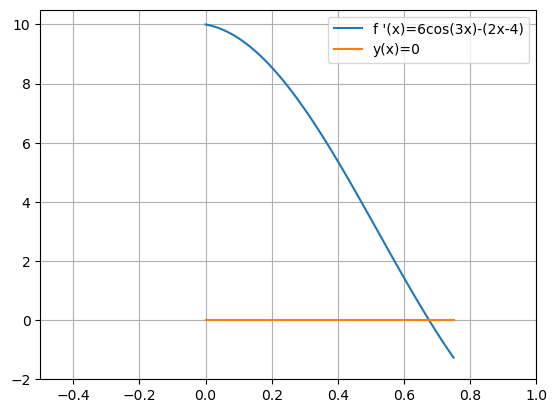

In [7]:
x = np.linspace(0, 0.75, 100)

fig, ax = plt.subplots()
ax.plot(x, derivative_f(x), label="f '(x)=6cos(3x)-(2x-4)")
ax.plot(x, 0*x, label='y(x)=0')
ax.set_xlim(-0.5, 1)
ax.set_ylim(-2, 10.5)
plt.legend()
plt.grid()
plt.show()

Первая производная меняет знак, поэтому определим вторую производную исследуемой функции:
$$f''(x) = -18\sin3x - 2.$$
Эта функция непрерывна, так как $\sin$ -- непрерывная функция

In [8]:
def second_derivative_f(x):
    return -18*np.sin(3*x) - 2

И построим график второй производной на выбранном отрезке.

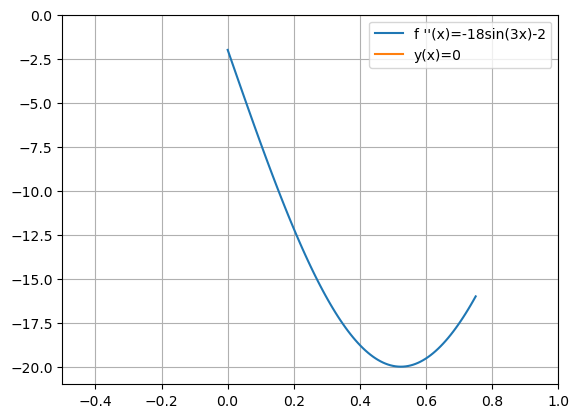

In [9]:
x = np.linspace(0, 0.75, 100)

fig, ax = plt.subplots()
ax.plot(x, second_derivative_f(x), label="f ''(x)=-18sin(3x)-2")
ax.plot(x, 0*x, label='y(x)=0')
ax.set_xlim(-0.5, 1)
ax.set_ylim(-21, 0)
plt.legend()
plt.grid()
plt.show()

Вторая производная отрицательна на всем рассматриваемом отрезке, поэтому мы можем считать функцию на этом отрезке монотонно убывающей. А значит на этом отрезке существует единственный корень рассматриваемого уравнения.

2. Рассмотрим отрезок $[0.75; 1.5]$. На левом конце отрезка функция положительна.

In [10]:
f(1.5)

-1.205060235330194

Функция на концах отрезка меняет знак, значит хотя бы один корень лежит в этом отрезке. Построим график первой производной на этом отрезке.

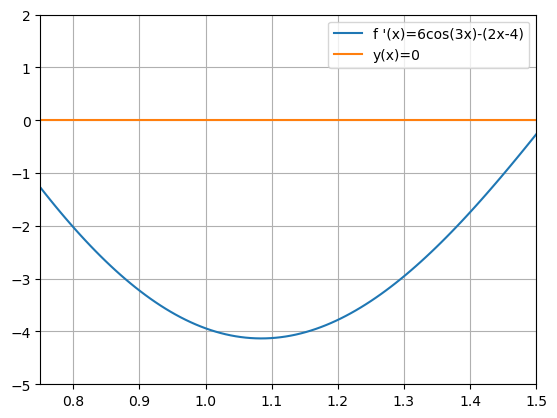

In [11]:
x = np.linspace(0.75, 1.5, 100)

fig, ax = plt.subplots()
ax.plot(x, derivative_f(x), label="f '(x)=6cos(3x)-(2x-4)")
ax.plot(x, 0*x, label='y(x)=0')
ax.set_xlim(0.75, 1.5)
ax.set_ylim(-5, 2)
plt.legend()
plt.grid()
plt.show()

На выбранном отрезке первая производная отрицательна, значит функция на этом отрезке монотонна, следовательно, корень на нем единственный.

3. Рассмотрим отрезок $[1.5; 2]$. На левом конце функция отрицательна.

In [12]:
f(2)

0.4411690036021483

Функция на концах отрезка меняет знак, значит хотя бы один корень лежит в этом отрезке. Построим график первой производной на этом отрезке.

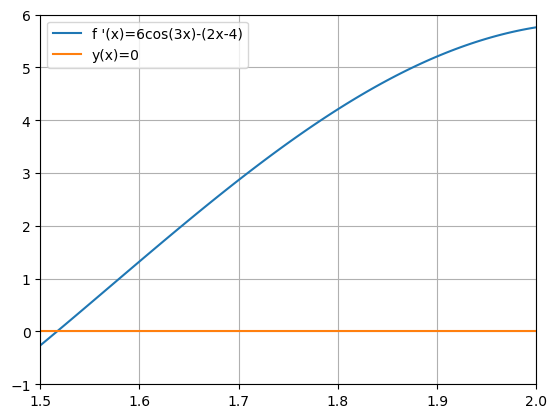

In [13]:
x = np.linspace(1.5, 2, 100)

fig, ax = plt.subplots()
ax.plot(x, derivative_f(x), label="f '(x)=6cos(3x)-(2x-4)")
ax.plot(x, 0*x, label='y(x)=0')
ax.set_xlim(1.5, 2)
ax.set_ylim(-1, 6)
plt.legend()
plt.grid()
plt.show()

Первая производная меняет знак, поэтому построим график второй производной:

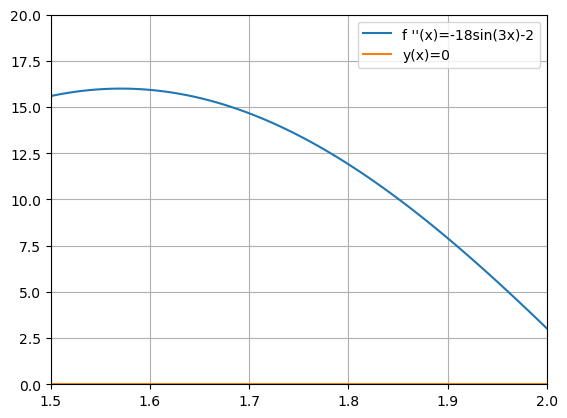

In [14]:
x = np.linspace(1.5, 2, 100)

fig, ax = plt.subplots()
ax.plot(x, second_derivative_f(x), label="f ''(x)=-18sin(3x)-2")
ax.plot(x, 0*x, label='y(x)=0')
ax.set_xlim(1.5, 2)
ax.set_ylim(0, 20)
plt.legend()
plt.grid()
plt.show()

Вторая производная положительна на всем рассматриваемом отрезке, поэтому мы можем считать функцию на этом отрезке монотонно возрастающей. А значит на этом отрезке корень единственный.

4. Рассмотрим отрезок $[3; 3.5]$.

In [15]:
f(3)

0.8242369704835131

In [16]:
f(3.5)

-3.0093915199433408

Функция на концах отрезка меняет знак, значит хотя бы один корень лежит в этом отрезке. Построим график первой производной на этом отрезке.

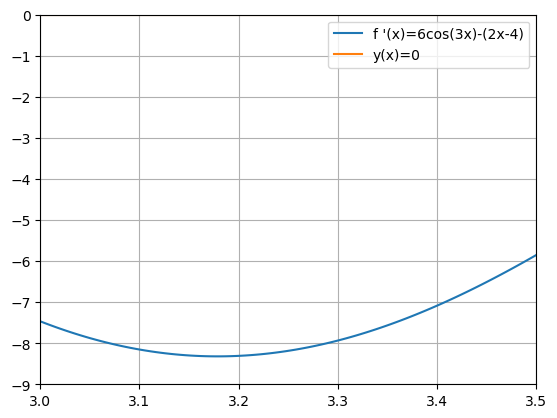

In [17]:
x = np.linspace(3, 3.5, 100)

fig, ax = plt.subplots()
ax.plot(x, derivative_f(x), label="f '(x)=6cos(3x)-(2x-4)")
ax.plot(x, 0*x, label='y(x)=0')
ax.set_xlim(3, 3.5)
ax.set_ylim(-9, 0)
plt.legend()
plt.grid()
plt.show()

На выбранном отрезке первая производная отрицательна, значит функция на этом отрезке монотонна, следовательно, корень на нем единственный.

#### Вывод

Таким образом, мы доказали, что выбранные нами разбиения числовой прямой содержат ровно по одному корню исследуемого уравнения. На этом решение задачи отделения корней можно закончить и переходить к отысканию приближенных значений корней, лежащих в этих отрезках с помощью указанных методов.

### Вычисление корней с требуемой точностью
Обусловимся тем, что мы будем заниматься отысканием корня из отрезка $[0, 0.75]$ для того, чтобы уменьшить размеры отчета в 4 раза. Этот корень будем приближать каждым рассматриваемым методом. Однако по аналогии можно найти приближения всех остальных корней, простым изменением рассматриваемого отрезка и начального приближения непосредственно в самом коде.

#### Метод Ньютона с постоянной производной

##### Описание метода

Формула этого метода имеет следующий вид $$x^{k+1} = x^k - \dfrac{f(x^k)}{f'(x^0)},\quad k=0,1,\ldots;\quad x^0.$$
Это видоизменение метода Ньютона напрямую связано с уменьшением количества арифметических операции, поскольку мы отказываемся от вычисления последовательности $f'(x^k)$. Таким образом, с точки зрения количества операций метод простой итерации и метод Ньютона становятся сравнимы между собой.
    
Геометрически это означает, что, выбрав $x^0$, мы движемся по касательной. Найдя $x^1$, мы будем двигаться из точки $x^1$ по той же касательной, т.е. все касательные будут параллельны касательной в точке, которая является начальным приближением к корню и так далее.

Но скорость сходимости данного метода ухудшится. Легко видеть, что погрешность на каждой итерации будет меняться по следующему закону $$\varepsilon_{k+1} = \varepsilon_k - \dfrac{f(x^* - \varepsilon_k)}{f'(x^0)}.$$
Проделав необходимые вычисления, связанные с разложением функции в окрестности $x^*$, можно получить $$\varepsilon_{k+1}\approx\Big(1 - \dfrac{f'(x^*)}{f'(x^0)}\Big)\varepsilon_k.$$
Исходя из вида полученной формулы, мы можем утверждать, что такой метод имеет линейную скорость сходимости.

##### Исследование сходимости метода

Выберем начальное приближение так $x^0$, чтобы выполнялись условия сходимости итерационного процесса:
1. Функция $f(x)$ определена и дважды непрерывно дифференцируема на отрезке $$s_0 = [x^0; x^0 + 2h_0],\quad h_0 =- \dfrac{f(x^0)}{f'(x^0)}.$$ При этом На концах отрезка $f(x)f'(x)\ne 0$.
2. Для начального приближения $x^0$ выполняется неравенство $$2|h_0|M \leq |f'(x_0)|,\quad M = \underset{x\in s_0}{\max}|f''(x)|.$$

In [18]:
x_0 = 0.25 # Задание начального приближение
print('x_0 =', x_0) 
h_0 = - f(x_0) / derivative_f(x_0)
print('h_0 =', h_0) 
s_0 = np.linspace(x_0, x_0 + 2*h_0, 1000)
print('s_0 = [', s_0[0], ';', s_0[-1], ']')

x_0 = 0.25
h_0 = 0.08861985736562038
s_0 = [ 0.25 ; 0.4272397147312408 ]


Функция $f(x)$ на отрезке $s_0$ непрерывна и дважды непрерывно дифференцируема на этом отрезке, так как она непрерывна и дважды непрерывно дифференцируема на всей числовой прямой. Рассмотрим значения на концах отрезка:
- левый конец:

In [19]:
f(s_0[0])*derivative_f(s_0[0])

-5.51695851252587

- правый конец:

In [20]:
f(s_0[-1])*derivative_f(s_0[-1])

2.1533114327715905

То есть первое условие сходимости выполнено. 

Рассмотрим второе условие:

In [21]:
M = np.max(np.absolute(second_derivative_f(s_0)))
M

19.253132284654036

In [22]:
2*np.absolute(h_0)*M <= np.absolute(derivative_f(x_0))

True

Оба условия сходимости выполнены, значит при выбранном начальном приближении $x^0$ итерационный процесс гарантировано будет сходящимся.

##### Программная реализация итерационного процесса

В первую очередь нам необходимо задать точность приближения решения. Пусть эта точность будет равна $$\varepsilon = 10^{-7}.$$

In [23]:
epsilon = 1e-7

Теперь реализуем сам итерационный процесс, который будет идти до тех пор, пока $$|x^{k+1} - x^{k}| \geq \varepsilon.$$
На каждом шаге мы будем записывать текущее значение $x^k$ и значение разности $(k+1)$-ого и $k$-ого приближений в таблицу, а в конце посчитаем количество итераций, необходимое для достижения заданной точности приближения. Также мы выведем время, затрачиваемое на выполнение итерационного процесса.

In [24]:
def phi(x):
    return x - f(x) / derivative_f(x_0)

In [25]:
x_k = x_0
x_k1 = phi(x_0)
iterations = [[x_k1, np.absolute(x_k1 - x_k)]]
while np.absolute(x_k1 - x_k) >= epsilon:
    x_k = x_k1
    x_k1 = phi(x_k)
    iterations.append([x_k1, np.absolute(x_k1 - x_k)])

In [26]:
newton_table = pd.DataFrame(iterations, columns=[('Метод Ньютона', 'x_k'), ('Метод Ньютона', '|x_k+1 - x_k|')])
newton_table.columns = pd.MultiIndex.from_tuples(newton_table.columns, names=['Назание метода', ''])
newton_table

Назание метода Метод Ньютона              
                         x_k |x_k+1 - x_k|
0                 0.33861986    0.08861986
1                 0.34626440    0.00764454
2                 0.34769100    0.00142660
3                 0.34797154    0.00028054
4                 0.34802724    0.00005570
5                 0.34803832    0.00001108
6                 0.34804053    0.00000220
7                 0.34804096    0.00000044
8                 0.34804105    0.00000009

Таким образом, мы смогли достичь заданной точности за 9 итераций, а заодно получили приближенный корень уравнения в выбранном нами отрезке.

#### Метод секущих

##### Описание метода

Возьмем за основу формулу производной $$f'(x^k)\approx \dfrac{f(x^k) -f(x^{k-1})}{x^{k} - x^{k-1}},\ k = 1,2,\ldots.$$
И, подставляя в формулу метода Ньютона, мы получим следующую формулу $$x^{k+1} = x^k - f(x^k)\dfrac{x^k - x^{k-1}}{f(x^k) - f(x^{k-1})},\ k = 1,2,\ldots;\ x^0.$$
Однако мы должны знать не только $x^0$, но и $x^1$, поэтому метод секущих двухшаговый.

Геометрически мы выбираем два приближения $x^0$ и $x^1$ и через две эти точки мы проводим прямую, и она является не касательной, а секущей. Таким образом, при пересечении секущей с осью $Ox$ мы получаем точку $x^2$. Проводим через $x^1$ и $x^2$ следующую секущую, получаем точку $x^3$ и так далее.

Количество операций в этом случае сравнимо с количеством операций метода Ньютона с постоянной производной. Но при этом мы выигрываем в скорости, покажем это. Мы имеем следующее уравнение для погрешности:
$$\varepsilon_{k+1} = \varepsilon_k - \dfrac{(\varepsilon_k - \varepsilon_{k+1})f(x^* - \varepsilon_k)}{f(x^* - \varepsilon_k) - f(x^* - \varepsilon_{k-1})}.$$
После выделения главной части из формулы и приведения подобных слагаемых, мы получим соотношение между погрешностями $$\varepsilon_{k+1}\approx -\dfrac{1}{2} \dfrac{f''(x^*)}{f'(x^*)}\varepsilon_k\varepsilon_{k-1}.$$
Таким образом, она выше чем линейная, но ниже, чем квадратичная. Для уточнения необходимо преобразовать данную величину. Соотношение на $k+1$ и $k$ итерациях может быть оценено как $$\varepsilon_{k+1}\approx C\varepsilon_k^\alpha,\quad \alpha = \dfrac{1+\sqrt5}{2}.$$

##### Исследование условий сходимости метода
Так как метод секущих, как и метод Ньютона с постоянной производной, является модификацией метода Ньютона, то для обоснования сходимости метода используется все те же условия, что и в предыдущем методе. Поэтому мы обусловимся тем, что выберем начальное приближение $x^0$ такое же, как и предыдущем методе, для которого мы уже доказали, что метод будет сходящимся.

##### Программная реализация итерационного процесса
Точность приближения возьмем ту же, что и в предыдущем методе, для того, чтобы сравнить оба метода между собой. Аналогичным образом реализуем итерационный процесс.

Но только в данном случае нам необходимо заранее задать еще $x^1$, которое мы возьмем как середину отрезка $s_0$, то есть $$x^1 = x^0 - \dfrac{f(x_0)}{f'(x_0)} = x^0 + h_0,\quad f'(x_0) \ne 0.$$

In [27]:
def phi(x_k, x_k1):
    return x_k - f(x_k) * (x_k - x_k1) / (f(x_k) - f(x_k1))

In [28]:
x_k = x_0
x_k1 = x_0 + h_0
x_k2 = phi(x_k, x_k1)
iterations = [[x_k1, np.absolute(x_k1 - x_k)]]
iterations.append([x_k2, np.absolute(x_k2 - x_k1)])
while np.absolute(x_k2 - x_k1) >= epsilon:
    x_k = x_k1
    x_k1 = x_k2
    x_k2 = phi(x_k, x_k1)
    iterations.append([x_k2, np.absolute(x_k2 - x_k1)])

In [29]:
secant_table = pd.DataFrame(iterations, columns=[('Метод секущих', 'x_k'), ('Метод секущих', '|x_k+1 - x_k|')])
secant_table.columns = pd.MultiIndex.from_tuples(secant_table.columns, names=['Назание метода', ''])
secant_table

Назание метода Метод секущих              
                         x_k |x_k+1 - x_k|
0                 0.33861986    0.08861986
1                 0.34698609    0.00836623
2                 0.34802754    0.00104145
3                 0.34804105    0.00001352
4                 0.34804107    0.00000002

In [30]:
comparison_table = pd.concat([newton_table, secant_table], axis=1).fillna(' ')
comparison_table

Назание метода Метод Ньютона               Метод секущих              
                         x_k |x_k+1 - x_k|           x_k |x_k+1 - x_k|
0                 0.33861986    0.08861986    0.33861986    0.08861986
1                 0.34626440    0.00764454    0.34698609    0.00836623
2                 0.34769100    0.00142660    0.34802754    0.00104145
3                 0.34797154    0.00028054    0.34804105    0.00001352
4                 0.34802724    0.00005570    0.34804107    0.00000002
5                 0.34803832    0.00001108                            
6                 0.34804053    0.00000220                            
7                 0.34804096    0.00000044                            
8                 0.34804105    0.00000009

В данном случае мы смогли достичь нужной нам точности также за 5 итераций, что является меньшим числом, чем в предыдущем методе. Таким образом, мы действительно выиграли в скорости по сравнению с методом Ньютона с постоянной производной. Но, как было оговорено ранее, по количеству арифметических операций мы остались примерно на том же уровне.

#### Метод Стеффенсена

##### Описание метода
Метод Стеффенсена основывается на том, что мы укажем способ вычисления $x^{k+1}$ через $x^k$ таким образом, чтобы обеспечить квадратичную скорость сходимости. Для увеличения скорости сходимости в данном методе используется преобразование Эйткена.
Пусть мы имеем $x^0$. Берем приближения $$x^1 = \varphi(x^0), \quad x^2 = \varphi(x^1) = \varphi(\varphi(x^0)).$$
Тогда мы можем при $n=1$ получить $$\sigma_1 = \dfrac{x^0x^2 - (x^1)^2}{x^2 - 2x^1 +x^0} = \dfrac{x^0 \varphi(\varphi(x^0)) - (\varphi(x^0))^2}{\varphi(\varphi(x^0)) - 2 \varphi(x^0) + x^0}.$$
Заменим в этой формуле соответствующим образом индексы. В итоге получается итерационная формула, которая получила название **метод Стеффенсена**
$$x^{k+1} = \dfrac{x^k \varphi(\varphi(x^k)) - (\varphi(x^k))^2}{\varphi(\varphi(x^k)) - 2 \varphi(x^k) + x^k},\ k=0,1,\ldots;\ x^0.$$
Метод Стеффенсена можно трактовать как метод простой итерации примененный к уравнению вида $$x = \Phi(x),$$ где $$\Phi(x) = \dfrac{x \varphi(\varphi(x)) - \varphi^2(x)}{\varphi(\varphi(x)) - 2\varphi(x) + x}.$$ 
Возникает вопрос сходимости метода.
Можно доказать, что функция $\Phi(x)$ вместе со своей производной будет непрерывна в окрестности точки $x^*$, причем $$\lim\limits_{x\to x^*}\Phi(x) = x^*.$$ Если предположить, что функция $\Phi(x^*) = x^*$ (то есть мы доопределяем ее), то $\Phi(x)$ будет непрерывна в точке $x^*$. Кроме того можно утверждать, что $$\Phi'(x^*) = \lim\limits_{x\to x^*}\dfrac{\Phi(x) - \Phi(x^*)}{x - x^*} = 0.$$
Таким образом, можно утверждать, что сходимость метода Стеффенсена будет квадратичной. То есть мы построили метод, обладающий повышенной скоростью сходимости. Но в 2 раза увеличивается объем вычислений, из-за того, что нужно вычислять функцию $\varphi(\varphi(x))$.

Мы можем гарантировать сходимость метода Стеффенсена в случае, когда исходный метод простой итерации является сходящимся.

Таким образом, алгоритм дальнейших действий следующий:
- построить формулу канонический вид итерационного процесса $x = \varphi(x)$;
- исследовать сходимость итерационного процесса;
- перестроить итерационную формулу по методу Стеффенсена;
- программно реализовать построенный итерационный процесс.

##### Построение формулы канонического вида итерационного процесса
Сперва нам необходимо задать формулу для итерационного процесса $x = \varphi(x)$. Будем строить ее следующим образом. Возьмем наше исходное уравнение $$f(x) = 0,$$ домножим с двух сторон на постоянную $\lambda$ и прибавим с двух сторон $x$, то есть $$x = \underset{\varphi(x)}{x + \lambda f(x)}.$$ Тогда проверим выполнение условия $$|\varphi'(x)| = |1 + \lambda f'(x)| < 1.$$
Отсюда $$-2< \lambda f'(x)< 0.$$ Для дальнейших действий нам необходимо выяснить, знак производной на отрезке. Поскольку ранее мы выяснили, что она на рассматриваемом отрезке $[0; 0.75]$ меняет знак, то немного сузим отрезок до $[0; 0.5]$. Тогда

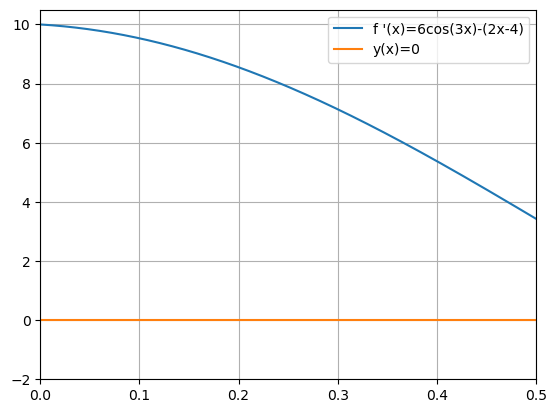

In [31]:
Delta = np.linspace(0, 0.5, 1000)

fig, ax = plt.subplots()
ax.plot(Delta, derivative_f(Delta), label="f '(x)=6cos(3x)-(2x-4)")
ax.plot(Delta, 0*Delta, label="y(x)=0")
ax.set_xlim(0, 0.5)
ax.set_ylim(-2, 10.5)
plt.legend()
plt.grid()
plt.show()

Как можно видеть по графику, на выбранном отрезке функция $f'(x)$ уже является строго положительной. Тогда $$-\dfrac{2}{M} < \lambda < 0,\quad M = \max_{[0; 0.5]}|f'(x)|.$$

In [32]:
M = np.max(np.absolute(derivative_f(Delta)))
M

10.0

Тогда мы можем выбрать $$\lambda \in (-0.2; 0).$$ Тогда возьмем, к примеру, $\lambda = -0.05$

In [33]:
Lambda = -0.05

Таким образом, мы можем задать функцию для канонического вида: $$\varphi(x) = x - 0.05 \cdot (2\sin 3x - x^2 + 4x - 3).$$

In [34]:
def phi(x):
    return x + Lambda * f(x)

##### Исследование условий сходимости метода
Так как метод Стеффенсена является модификацией метода простой итерации, то и для сходимости метода нам необходимо проверить выполнение условий сходимости метода простой итерации. 

**Теорема о сходимости метода простой итерации**.
Пусть выполняются следующие условия:
1. функция $\varphi(x)$ определена на отрезке $$\Delta = |x - x^0| \leq \delta,$$ непрерывна на нем и удовлетворяет условию Липшица с постоянным коэффициентом меньше единицы, то есть $\forall x, \widetilde{x}$ $$|\varphi(x) - \varphi(\widetilde{x})| \leq q |x - \widetilde{x}| ,\quad 0 \leq q < 1;$$
2. для начального приближения $x^0$ верно неравенство $$|x^0 - \varphi(x^0)| \leq m;$$
3. числа $\delta, q, m$ удовлетворяют условию $$\dfrac{m}{1-q}\leq \delta.$$

Тогда
1. уравнение $f(x) = 0$ в области $\Delta$ имеет решение;
2. последовательность $x^k$ построенная по правилу $x = \varphi(x)$ принадлежит отрезку $[x^0 - \delta, x^0 + \delta]$, является сходящейся и ее предел удовлетворяет уравнению $f(x) = 0$: $$x^k \xrightarrow[k\to \infty]{} x^*;$$
3. скорость сходимости $x^k$ к $x^*$ оценивается неравенством $$|x^* - x^k| \leq \dfrac{m}{1- q}q^k,\ k = 1,2,\ldots$$


**Замечание.** Для построения сходящегося метода простой итерации в практических вычислениях условие 1 теоремы о сходимости метода простой итерации обычно заменяется более строгим требованием, а именно для всех $x$ из отрезка $|x - x^0| \leq \delta$ функция $\varphi(x)$ имеет непрерывную первую производную $\varphi'(x)$ такую, что $$|\varphi'(x)|\leq q <1 \quad \forall x \in [x_0 - \delta; x_0 + \delta].$$

Исследуем сходимость построенного итерационного процесса. Рассмотрим первое условие теоремы о сходимости. Сперва зададим начальное приближение как середину рассматриваемого отрезка $[0; 0.5]$ -- $x_0 = 0.25$. Очевидно на этом отрезке функция определена, непрерывна и дифференцируема (мы показали это ранее).

In [35]:
Delta = np.linspace(0, 0.5, 1000)
x_0 = (Delta[0] + Delta[-1]) / 2
print('x_0 =', x_0)

x_0 = 0.25


In [36]:
delta = x_0 - Delta[0]
print('delta =', delta)

delta = 0.25


Заменим условие Липшица условием из замечания для отыскания числа $q$. Для этого продифференцируем функцию $\varphi(x)$:
$$\varphi'(x) = 1+\lambda f'(x).$$ Тогда возьмем $$q = \max_{[0; 0.5]} |1+\lambda\cdot f'(x)|.$$

In [37]:
q = np.max(np.absolute(1+Lambda*derivative_f(Delta)))
q

0.8287788394996891

Таким образом, первое условие теоремы проверено. Теперь найдем $m$ из второго условия теоремы:

In [38]:
m = np.absolute(x_0 - phi(x_0))
m

0.0349611239976666

Остается лишь проверить выполнение условия из третьего пункта:

In [39]:
m / (1-q) <= delta

True

Таким образом, мы построили итерационную формулу, соблюдая все условия теоремы о сходимости. То есть на данный момент у нас есть формула сходящегося процесса метода простой итерации. Перестроим эту формулу так, чтобы получился метод Стеффенсена.

##### Перестроение итерационной формулу по методу Стеффенсена
Вспомним, что метод Стеффенсена задается формулой $$x = \Phi(x),$$ где $$\Phi(x) = \dfrac{x \varphi(\varphi(x)) - \varphi^2(x)}{\varphi(\varphi(x)) - 2\varphi(x) + x}.$$ 

In [40]:
def Phi(x):
    return (x*phi(phi(x)) - (phi(x))**2) / (phi(phi(x)) - 2*phi(x) + x)

Исходный итерационный процесс сходился, поэтому и новый построенный итерационный процесс будет также сходящимся. Поэтому перейдем сразу к программной реализации итерационного процесса.

##### Программная реализация итерационного процесса
Все условия остановки итерационного процесса переходят с прошлых методов. Т.е. $\varepsilon = 10^{-7}$, и условие останова $$|x^{k+1} - x^k| < \varepsilon.$$

In [41]:
x_k = x_0
x_k1 = Phi(x_0)
iterations = [[x_k1, np.absolute(x_k1 - x_k)]]

while np.absolute(x_k1 - x_k) >= epsilon:
    x_k = x_k1
    x_k1 = Phi(x_k)
    iterations.append([x_k1, np.absolute(x_k1 - x_k)])

In [42]:
steffensen_table = pd.DataFrame(iterations, columns=[('Метод Стеффенсена', 'x_k'), ('Метод Стеффенсена', '|x_k+1 - x_k|')])
steffensen_table.columns = pd.MultiIndex.from_tuples(steffensen_table.columns, names=['Назание метода', ''])
steffensen_table

Назание метода Метод Стеффенсена              
                             x_k |x_k+1 - x_k|
0                     0.34160704    0.09160704
1                     0.34800269    0.00639565
2                     0.34804107    0.00003838
3                     0.34804102    0.00000005

In [43]:
comparison_table = pd.concat([newton_table, secant_table, steffensen_table], axis=1).fillna(' ')
comparison_table

Назание метода Метод Ньютона               Метод секущих                \
                         x_k |x_k+1 - x_k|           x_k |x_k+1 - x_k|   
0                 0.33861986    0.08861986    0.33861986    0.08861986   
1                 0.34626440    0.00764454    0.34698609    0.00836623   
2                 0.34769100    0.00142660    0.34802754    0.00104145   
3                 0.34797154    0.00028054    0.34804105    0.00001352   
4                 0.34802724    0.00005570    0.34804107    0.00000002   
5                 0.34803832    0.00001108                               
6                 0.34804053    0.00000220                               
7                 0.34804096    0.00000044                               
8                 0.34804105    0.00000009                               

Назание метода Метод Стеффенсена                
                             x_k |x_k+1 - x_k|  
0                     0.34160704    0.09160704  
1                     0.34800269    0.00639565  
2                     0.34804107    0.00003838  
3                     0.34804102    0.00000005  
4                                               
5                                               
6                                               
7                                               
8

Таким образом, в методе Стеффенсена нам понадобилось 4 итерации, что оказалось еще меньше, чем в методе секущих. То есть мы выиграли в количестве итераций, однако количество операций в данном методе уже больше, чем в предыдущих.

#### Метод Чебышева третьего порядка

##### Описание метода
Идея метода базируется на способе построения итерационного процесса таким образом, чтобы обеспечить обращение в ноль производных от функции $\varphi(x)$ в точке $x^*$, то есть мы берем уравнение $$x = \varphi(x)$$ и стараемся построить метод, у которого максимальное количество производных обращается в ноль в точке $x^*$. Для этого функцию $\varphi(x)$ запишем в виде $$\varphi(x) = x+ \psi_1(x) f(x) + \psi_2(x)f^2(x) + \ldots + \psi_{n-1}(x)f^{n-1}(x),$$
где $f(x)$ --- это исходная функция, для которой мы ищем корни. Требуется выбрать функции $\psi_1(x),\ldots, \psi_{n-1}(x)$ так, чтобы $$\varphi^{(j)}(x)\Big|_{f(x)=0} = 0,\quad j=1,2,\ldots,n-1$$
Рассмотрим условие на первую производную $$
	\varphi'(x)\Big|_{f(x) = 0} = 1 + \psi_1'(x)f(x) + \psi_1(x) f'(x) + \psi_2'(x) f^2(x) + 2\psi_2(x) f(x) f'(x) + \ldots \Big|_{f(x) = 0}=\\=1 + \psi_1(x) f'(x) \Big|_{f(x) = 0} = 0.$$
Аналогичным образом мы можем записать вторую производную
$$\varphi''(x)\Big|_{f(x) = 0} = 2\psi_1' f'(x) + \psi_1(x) f''(x) + 2\psi_2(x) (f'(x))^2 \Big|_{f(x) = 0} = 0.$$
Из условия $\varphi'(x)\Big|_{f(x) = 0}=0$ следует, что функция $$\psi_1(x) = -\dfrac{1}{f'(x)}.$$ Отсюда $$\varphi(x) = x + \Big(-\dfrac{1}{f'(x)}\Big)f(x),$$ то есть мы пришли к методу Ньютона, итерационному процессу второго порядка.
Из условия, что $\varphi''(x)\Big|_{f(x) = 0}=0$, применяя простые арифметические действия, мы можем получить $$\psi_2(x) = -\dfrac{f''(x)}{2(f'(x))^3}.$$ Учитывая выражения для $\psi_1$ и $\psi_2$ мы модем построить итерационный процесс третьего порядка с кубической скоростью сходимости $$x^{k+1} = x^k - \dfrac{f(x^k)}{f'(x^k)} - \dfrac{f^2(x^k)f''(x^k)}{2(f'(x^k))^3}$$ и будем называть эту формулу **методом Чебышева**. В этом методе мы также увеличиваем количество операций, так как необходимо вычислять значения $f(x), f'(x), f''(x)$.

##### Исследование условий сходимости метода

Условия на сходимость метода Чебышева мы не исследовали, однако будем предполагать, что итерационный процесс будет также сходящимся на выбранном отрезке $\Delta = [0; 0.5]$ и при выбранном начальном приближении $x^0 = 0.25$ (впрочем мы доказали, что метод Ньютона и метод простой итерации при выбранных параметрах сходятся).

##### Программная реализация метода

In [44]:
def phi(x):
    return x - f(x)/derivative_f(x) - ((f(x))**2 * second_derivative_f(x)) / (2 * (derivative_f(x))**3)

In [45]:
x_k = x_0
x_k1 = phi(x_0)
iterations = [[x_k1, np.absolute(x_k1 - x_k)]]
while np.absolute(x_k1 - x_k) >= epsilon:
    x_k = x_k1
    x_k1 = phi(x_k)
    iterations.append([x_k1, np.absolute(x_k1 - x_k)]) 

In [46]:
chebyshev_table = pd.DataFrame(iterations, columns=[('Метод Чебышева', 'x_k'), ('Метод Чебышева', '|x_k+1 - x_k|')])
chebyshev_table.columns = pd.MultiIndex.from_tuples(chebyshev_table.columns, names=['Назание метода', ''])
chebyshev_table  

Назание метода Метод Чебышева              
                          x_k |x_k+1 - x_k|
0                  0.34572146    0.09572146
1                  0.34804102    0.00231956
2                  0.34804107    0.00000006

In [47]:
comparison_table = pd.concat([newton_table, secant_table, steffensen_table, chebyshev_table], axis=1).fillna(' ')
comparison_table

Назание метода Метод Ньютона               Метод секущих                \
                         x_k |x_k+1 - x_k|           x_k |x_k+1 - x_k|   
0                 0.33861986    0.08861986    0.33861986    0.08861986   
1                 0.34626440    0.00764454    0.34698609    0.00836623   
2                 0.34769100    0.00142660    0.34802754    0.00104145   
3                 0.34797154    0.00028054    0.34804105    0.00001352   
4                 0.34802724    0.00005570    0.34804107    0.00000002   
5                 0.34803832    0.00001108                               
6                 0.34804053    0.00000220                               
7                 0.34804096    0.00000044                               
8                 0.34804105    0.00000009                               

Назание метода Метод Стеффенсена               Метод Чебышева                
                             x_k |x_k+1 - x_k|            x_k |x_k+1 - x_k|  
0                     0.34160704    0.09160704     0.34572146    0.09572146  
1                     0.34800269    0.00639565     0.34804102    0.00231956  
2                     0.34804107    0.00003838     0.34804107    0.00000006  
3                     0.34804102    0.00000005                               
4                                                                            
5                                                                            
6                                                                            
7                                                                            
8

Таким образом, метод Чебышева дал нам необходимое приближение за еще меньшее число итераций, оказавшись самым быстрым по сходимости из всех рассмотренных методов.

## Вывод 
В процессе решения задачи отыскания корней заданного уравнения мы решили также задачи отделения корней, а затем отыскания приближенных решений. Для каждого из рассмотренных методов отыскания приближенных решений была доказана сходимость методов. Мы нашли приближенное с точностью до 7 знаков одно решение уравнение, однако описанными методами можно также найти приближенные значения и всех остальных корней уравнения. Но для этого нужно будет выбрать начальные приближения и обосновать сходимость для каждого корня.

Также мы на практике подтвердили все теоретические выкладки о скорости сходимости методов:
- самым медленным оказался метод Ньютона с постоянной производной, обладающий линейной скоростью сходимости;
- метод секущих имеет скорость сходимости выше линейной, но ниже квадратичной, поэтому он оказался быстрее;
- метод Стеффенсена имеет квадратичную скорость сходимости, поэтому он справился быстрее метода секущих;
- метод Чебышева третьего порядка имеет кубическую скорость сходимости, и он очевидно быстрее всех предыдущих методов.

## Задача 2

Найти с точностью $\varepsilon = 10^{-6}$ наибольший по модулю корень уравнения $$\sum\limits_{i=0}^n a_ix^i = 0,$$ где вектор коэффициентов $a$ есть решение системы линейных алгебраических уравнений $$Aa = f$$ с $$A = \begin{pmatrix} 5 & -1.2 & 3.5 & 1 & -0.1\\ 1.1 & -9.8 & -1.1 & 0.1 & 2.3 \\ -1.1 & 3.1 & 13 & 2.5& 4.6 \\ 0.2& 0.3& 2.3& 15.6& 2\\ 0.1&-2.8 & 4 & 3.2& -17.8 \end{pmatrix},\quad f =\begin{pmatrix} 2\\ 0.6\\ 2.7\\ -3.4\\ 5 \end{pmatrix}$$

### Описание метода решения задачи

Данная задача разбивается на две задачи:
1. отыскание решения системы линейных уравнений;
2. численное отыскание наибольшего по модулю корня уравнения.

### Отыскание решения системы линейных уравнений;

Для решения системы линейных алгебраических уравнений воспользуемся методом Гаусса с выбором главного элемента по столбцу. Описание алгоритма данного метода мы опустим, так как эта задача решалась нами ранее.

In [48]:
def gaussian(matrix, column):
    insertions = 0 # Число перестановок
    A = matrix.copy() # Сохраняем переданную матрицу в локальную переменную
    b = column.copy() # Сохраняем переданный столбец в локальную переменную
    for k in range(A.shape[0]):
        leading_row = k # Столбец, в котором ведущий элемент, считаем равным номеру шага
        for i in range(k, A.shape[0]): # находим максимальный по модулю элемент в столбце
            if math.fabs(A[i][k]) > math.fabs(A[leading_row][k]):
                leading_row = i # Номер столбца с ведущим элементом принимает значение того, ...
                # ...в котором находится больший элемент, чем текущий ведущий элемент
        for j in range(k, A.shape[1]): # меняем местами строку, в которой главный элемент, со строкой равной номеру шага
            A[leading_row][j], A[k][j] =  A[k][j], A[leading_row][j]
        insertions+=1 # повышаем число перестановок
        
        # Прямой ход
        q = b[k] / A[k][k]
        for j in range(A.shape[0] - 1, k - 1, -1):
            c = A[k][j] / A[k][k]
            for i in range(A.shape[0] - 1, k, -1):
                    A[i][j] = A[i][j] - A[i][k]*c
                    if j == A.shape[0] - 1:
                        b[i] = b[i] - A[i][k]*q
    
    # Обратный ход
    x=np.zeros(A.shape[0]) # Создаем итоговый вектор решений, заполненный нулями
    for i in range(A.shape[0]-1, -1, -1):
        summary = 0
        for j in range(i+1, A.shape[0]):
            summary += A[i][j]*x[j]
        x[i] = (b[i] - summary) / A[i][i]
    
    return x.tolist();

In [49]:
A = np.array([[5, -1.2, 3.5, 1, -0.1],
              [1.1, -9.8, -1.1, 0.1, 2.3],
              [-1.1, 3.1, 13, 2.5, 4.6],
              [0.2, 0.3, 2.3, 15.6, 2],
              [0.1, -2.8, 4, 3.2, -17.8]])
f = np.array([2, 0.6, 2.7, -3.4, 5])

In [50]:
a = gaussian(A, f)
print(*a, sep='\n')

0.1466017362173818
-0.14061178804228955
0.37756997790570673
-0.24495232438669967
-0.21714574979070014


Полученный вектор является вектором коэффициентов для исследуемого нами многочлена. Определим функцию для самого многочлена, с помощью которой мы сможем проверять, является ли найденное нами число корнем уравнения.

In [51]:
def P(x):
    P = 0
    n = len(a)
    for i in range(n):
        P += x**i * a[i]
    return P

**Отступление**. *Задачу отыскания наибольшего по модулю корня для многочлена рациональнее всего решать методом Лобачевского. Поскольку никаких предварительных исследований уравнения делать не нужно, а нужно лишь задать основной алгоритм вычисления коэффициентов. Однако в данном случае при попытке применить метод Лобачевского нужная точность не достигается из-за того, что после нескольких итераций коэффициенты становятся бесконечно малыми по модулю. Как следствие, при попытке вычислить корень происходит деление на ноль. В итоге алгоритм становится недействительным.*

Для отыскания нужного нам корня будем действовать по той же схеме, что и в предыдущей задаче, то есть сначала решим задачу отделения искомого корня, а затем найдем его приближение с заданной точностью с помощью одного из методов.

Нам известно, что, вообще говоря, уравнение имеет 4 корня, но необязательно действительных. Переформулируем задачу. Пусть нам необходимо найти наибольший по модулю *дейсвтительный* корень многочлена (так как задача отыскания комплексных корней является более сложной).

Для того, чтобы выяснить, есть ли вообще действительные корни у данного уравнения, воспользуемся графическим методом. Изобразим график функции $P(x)$.

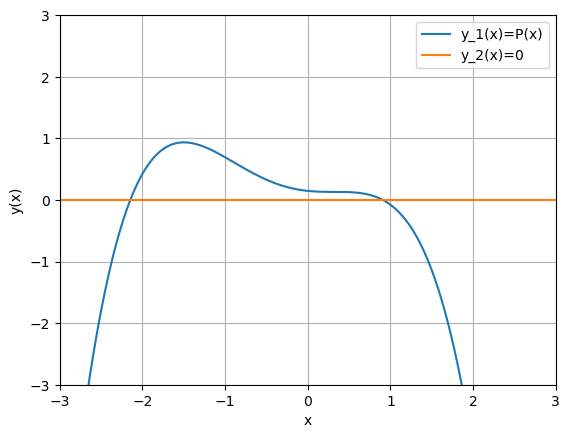

In [52]:
x = np.linspace(-10, 10, 1000)

fig, ax = plt.subplots()
ax.plot(x, P(x), label='y_1(x)=P(x)')
ax.plot(x, 0*x, label='y_2(x)=0')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()

Из графика следует, что исследуемое уравнение имеет два дейсвтительных корня. Причем тот, что является наибольшим по модулю, явно лежит где-то в отрезке $[0.5, 1]$. Докажем это по аналогии с отделением корней для предыдущей задачи:
- исследуем значения на концах отрезка:

In [53]:
P(0.5)

0.12649768676240747

In [54]:
P(1)

-0.07853814809660084

Значения на концах различны по знаку, значит в выбранном отрезке корень уравнения существует.
- исследуем функцию на монотонность в пределах отрезка:
для этого вычислим производную функции:
$$P'(x) = 4a_4 x^3 + 3a_3x^2 + 2a_2x + a_1.$$

In [55]:
def derivative_P(x):
    P = 0
    n = len(a)
    for i in range(1, n):
        P += i*x**(i-1) * a[i]
    return P

Построим график производной функции для того, чтобы определить, меняет ли она знак.

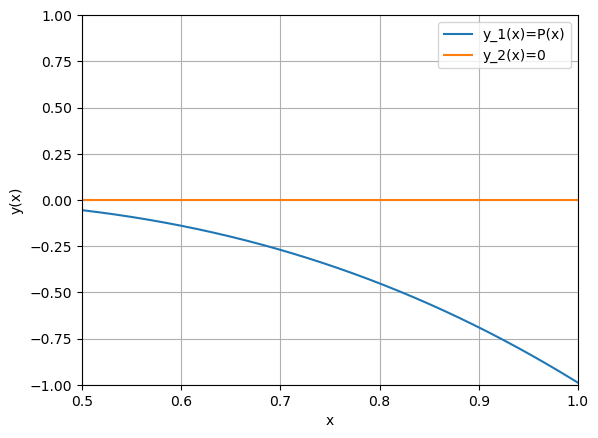

In [56]:
x = np.linspace(0.5, 1, 1000)

fig, ax = plt.subplots()
ax.plot(x, derivative_P(x), label='y_1(x)=P(x)')
ax.plot(x, 0*x, label='y_2(x)=0')
ax.set_xlim(0.5, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()

Производная на всем рассматриваемом отрезке принимает лишь отрицательные значения, поэтому сама функция является монотонной на отрезке. Следовательно, корень на отрезке единственный. Таким образом, задача отделения корня решена. 

Теперь перейдем к этапу отыскания приближения с заданной точностью. Для решения этой задачи воспользуемся стандартным методом Ньютона $$x^{k+1} = x^k - \dfrac{f(x^k)}{f'(x^k)},\quad k=0,1,\ldots;\quad x^0.$$ (поскольку в прошлой задаче этот метод не рассматривался). Аналогично сперва выберем такое начальное приближение, чтобы метод сходился, а затем построим итерационный процесс.

In [57]:
x_0 = 0.9 # Задание начального приближения
print('x_0 =', x_0) 
h_0 = - P(x_0) / derivative_P(x_0)
print('h_0 =', h_0) 
s_0 = np.linspace(x_0, x_0 + 2*h_0, 1000)
print('s_0 = [', s_0[0], ';', s_0[-1], ']')

x_0 = 0.9
h_0 = 0.007025121647090402
s_0 = [ 0.9 ; 0.9140502432941808 ]


Функция $P(x)$ определена и дважды непрерывно дифференцируема на отрезке $s_0$. Также

In [58]:
P(s_0[0])*derivative_P(s_0[0])

-0.003339010642683926

In [59]:
P(s_0[-1])*derivative_P(s_0[-1])

0.0037186585513348832

То есть на концах отрезка значения функции и ее производной в ноль не обращаются. Проверим выполение неравенства для начального приближения: для этого определим вторую производную исследуемой функции $$P''(x)= 12a_4 x^2 + 6a_3x + 2a_2$$

In [60]:
def second_derivative_P(x):
    P = 0
    n = len(a)
    for i in range(2, n):
        P += i*(i-1)*x**(i-2) * a[i]
    return P

In [61]:
M = np.max(np.absolute(second_derivative_P(s_0)))
M

2.7653240548229308

In [62]:
2*np.absolute(h_0)*M <= np.absolute(derivative_P(x_0))

True

Таким образом, оба условия выполнены, а значит итерационный процесс будет являться сходящимся. Приведем программную реализацию итерационного процесса.

In [63]:
epsilon = 1e-6

In [64]:
def phi(x):
    return x - P(x) / derivative_P(x)

In [65]:
x_k = x_0
x_k1 = phi(x_0)
iterations = [[x_k1, np.absolute(x_k1 - x_k)]]
while np.absolute(x_k1 - x_k) >= epsilon:
    x_k = x_k1
    x_k1 = phi(x_k)
    iterations.append([x_k1, np.absolute(x_k1 - x_k)])

In [66]:
newton_table = pd.DataFrame(iterations, columns=[('Метод Ньютона', 'x_k'), ('Метод Ньютона', '|x_k+1 - x_k|')])
newton_table.columns = pd.MultiIndex.from_tuples(newton_table.columns, names=['Назание метода', ''])
newton_table

Назание метода Метод Ньютона              
                         x_k |x_k+1 - x_k|
0                 0.90702512    0.00702512
1                 0.90693132    0.00009380
2                 0.90693131    0.00000002

В итоге мы получили искомый наибольший по модулю вещественный корень для исследуемого алгебраического уравнения. Убедимся в том, что полученное решение действительно является корнем:

In [67]:
P(x_k1)

-3.3306690738754696e-16

Значит искомый корень равен $$x \approx 0.9069313$$

И этот корень мы смогли найти всего за 3 итерации (за счет выбора очень близкого к корню начального приближения).

### Вывод
Таким образом, мы смогли найти наибольший по модулю корень для алгебраического уравнения. Описанный способ нахождения корня является не самым оптимальным, однако при достаточно хорошем выборе отрезка отделения корня и выборе начального приближения найти корень оказалось весьма несложно.